In [2]:
import cv2

In [3]:
img = cv2.imread('barr.jpg')

In [4]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

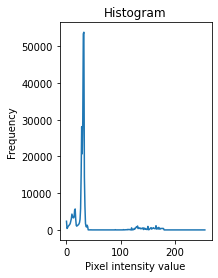

In [9]:
import matplotlib.pyplot as plt
import numpy as np
hist = cv2.calcHist([img_hsv],[0], None, [256], [0,256])
plt.subplot(122),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Histogram')
plt.show()

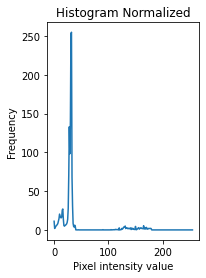

In [10]:
hist_norm = cv2.normalize(hist,hist,0,255,cv2.NORM_MINMAX)
res = cv2.calcBackProject([img_hsv],[0,1],hist_norm,[0,180,0,256],1)
plt.subplot(122),plt.plot(hist_norm),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Histogram Normalized')
plt.show()

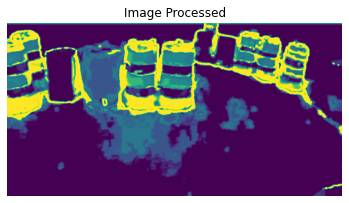

In [11]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
img_process = cv2.filter2D(res, -1, disc, res) #res is the matrix obtained after back projection
plt.figure(),plt.axis("off"),plt.title("Image Processed"),plt.imshow(img_process)
plt.show()

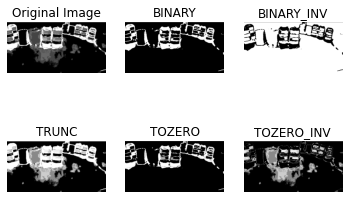

In [12]:
ret,thresh1 = cv2.threshold(img_process,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_process,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_process,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_process,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_process,127,255,cv2.THRESH_TOZERO_INV)

plt.subplot(231),plt.imshow(img_process,cmap='gray'),plt.title("Original Image"),plt.axis("off")
plt.subplot(232),plt.imshow(thresh1,cmap='gray'),plt.title("BINARY"),plt.axis("off")
plt.subplot(233),plt.imshow(thresh2,cmap='gray'),plt.title("BINARY_INV"),plt.axis("off")
plt.subplot(234),plt.imshow(thresh3,cmap='gray'),plt.title("TRUNC"),plt.axis("off")
plt.subplot(235),plt.imshow(thresh4,cmap='gray'),plt.title("TOZERO"),plt.axis("off")
plt.subplot(236),plt.imshow(thresh5,cmap='gray'),plt.title("TOZERO_INV"),plt.axis("off")
plt.show()

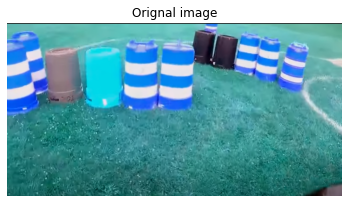

In [13]:
img = cv2.imread('barr.jpg')
plt.figure(),plt.axis("off"),plt.title("Orignal image"),plt.imshow(img)
plt.show()

the binary inverse image give quite good vizualization

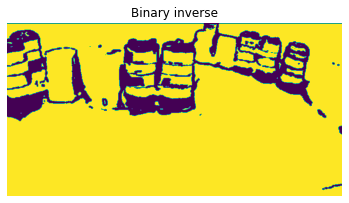

In [14]:
plt.figure(),plt.axis("off"),plt.title("Binary inverse"),plt.imshow(thresh2)
plt.show()

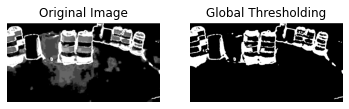

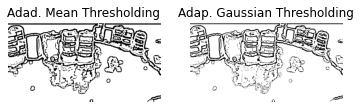

In [15]:
ret,th1 = cv2.threshold(img_process,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_process,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,5)
th3 = cv2.adaptiveThreshold(img_process,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,5)

plt.figure()
plt.subplot(121),plt.imshow(img_process,cmap='gray'),plt.title("Original Image"),plt.axis("off")
plt.subplot(122),plt.imshow(th1,cmap='gray'),plt.title("Global Thresholding"),plt.axis("off")
plt.figure()
plt.subplot(121),plt.imshow(th2,cmap='gray'),plt.title("Adad. Mean Thresholding"),plt.axis("off")
plt.subplot(122),plt.imshow(th3,cmap='gray'),plt.title("Adap. Gaussian Thresholding"),plt.axis("off")
plt.show()

all these type of thresholding gives a similar value but the best is binaryinverse also global inverse gives a similar
vizualisation

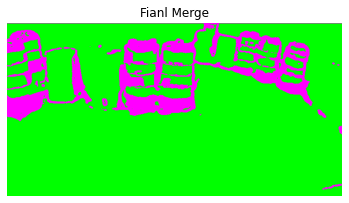

In [16]:
#this is the final merge of the 3 best images.
final = cv2.merge((thresh1,thresh2,th1))
plt.figure(),plt.axis("off"),plt.title("Fianl Merge"),plt.imshow(final)
plt.show()

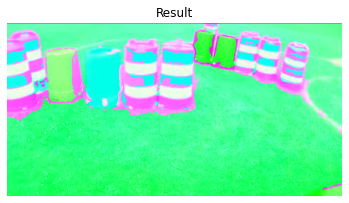

In [17]:
#Comparing the result and the orignal image using a bitwise or operation.
#Understanding how good our model was.
result = cv2.bitwise_or(img, final)
plt.figure(),plt.axis("off"),plt.title("Result"),plt.imshow(result)
plt.show()

It was quite close.

It gives quite a nice result. We can also differentiate between bucket and the barrel. It does give some noise but, overall we can recognise where our barrels are.
Using these types of image filters and thresholding is fun.

### Thank You